In [21]:
from zget_data import get_responses, get_qdetails, get_questions, get_design, page_map, quest_map, attention, did_map
from scipy.stats import shapiro, yeojohnson, kruskal
import scikit_posthocs as sp
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json

In [22]:
page_id = '14'
password_response, time_response, survey_response, dids = get_responses()
survey_response_df = pd.DataFrame(survey_response)

demo = pd.json_normalize(survey_response_df[page_id])

new_index = {}
for qsid in demo.columns:
    new_index[qsid] = get_qdetails(page_id, qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index, axis=1)
demo['did'] = dids
demo['design'] = demo['did'].apply(lambda x: get_design(x))
demo.drop('did', axis=1, inplace=True)
demo['race'] = demo['race'].apply(lambda x: ','.join(x))
demo.to_csv('data/csvs/demo.csv')
demo

Total: 163; 
Attentive: 131; Non Attentive: 32


,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,design
0,Man,25-29 years old,White,Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Pursuing or completed a degree,Pursuing or completed a degree,Metaphor
1,Man,35-39 years old,Hispanic or Latino,High School Graduate,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,No experience,Personal
2,Man,18-24 years old,White,Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Unemployed,No experience,No experience,Consequences
3,Woman,30-34 years old,White,Four-year College Degree,Other areas of Engineering,Non-profit organization,Pursuing or completed a degree,Formal training,Consequences
4,Man,35-39 years old,Native American or American Indian,Four-year College Degree,Business,Business or industry,Pursuing or completed a degree,Formal training,Logos
...,...,...,...,...,...,...,...,...,...
126,Man,35-39 years old,Asian,High School Graduate,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Formal training,Logos
127,Woman,50-54 years old,Asian,Four-year College Degree,Business,Business or industry,No experience,No experience,Consequences
128,Woman,55-59 years old,White,High School Graduate,I prefer not to answer,I prefer not to answer,No experience,No experience,Professional
129,Man,25-29 years old,I prefer not to answer,Four-year College Degree,I prefer not to answer,I prefer not to answer,Self-taught,No experience,Logos


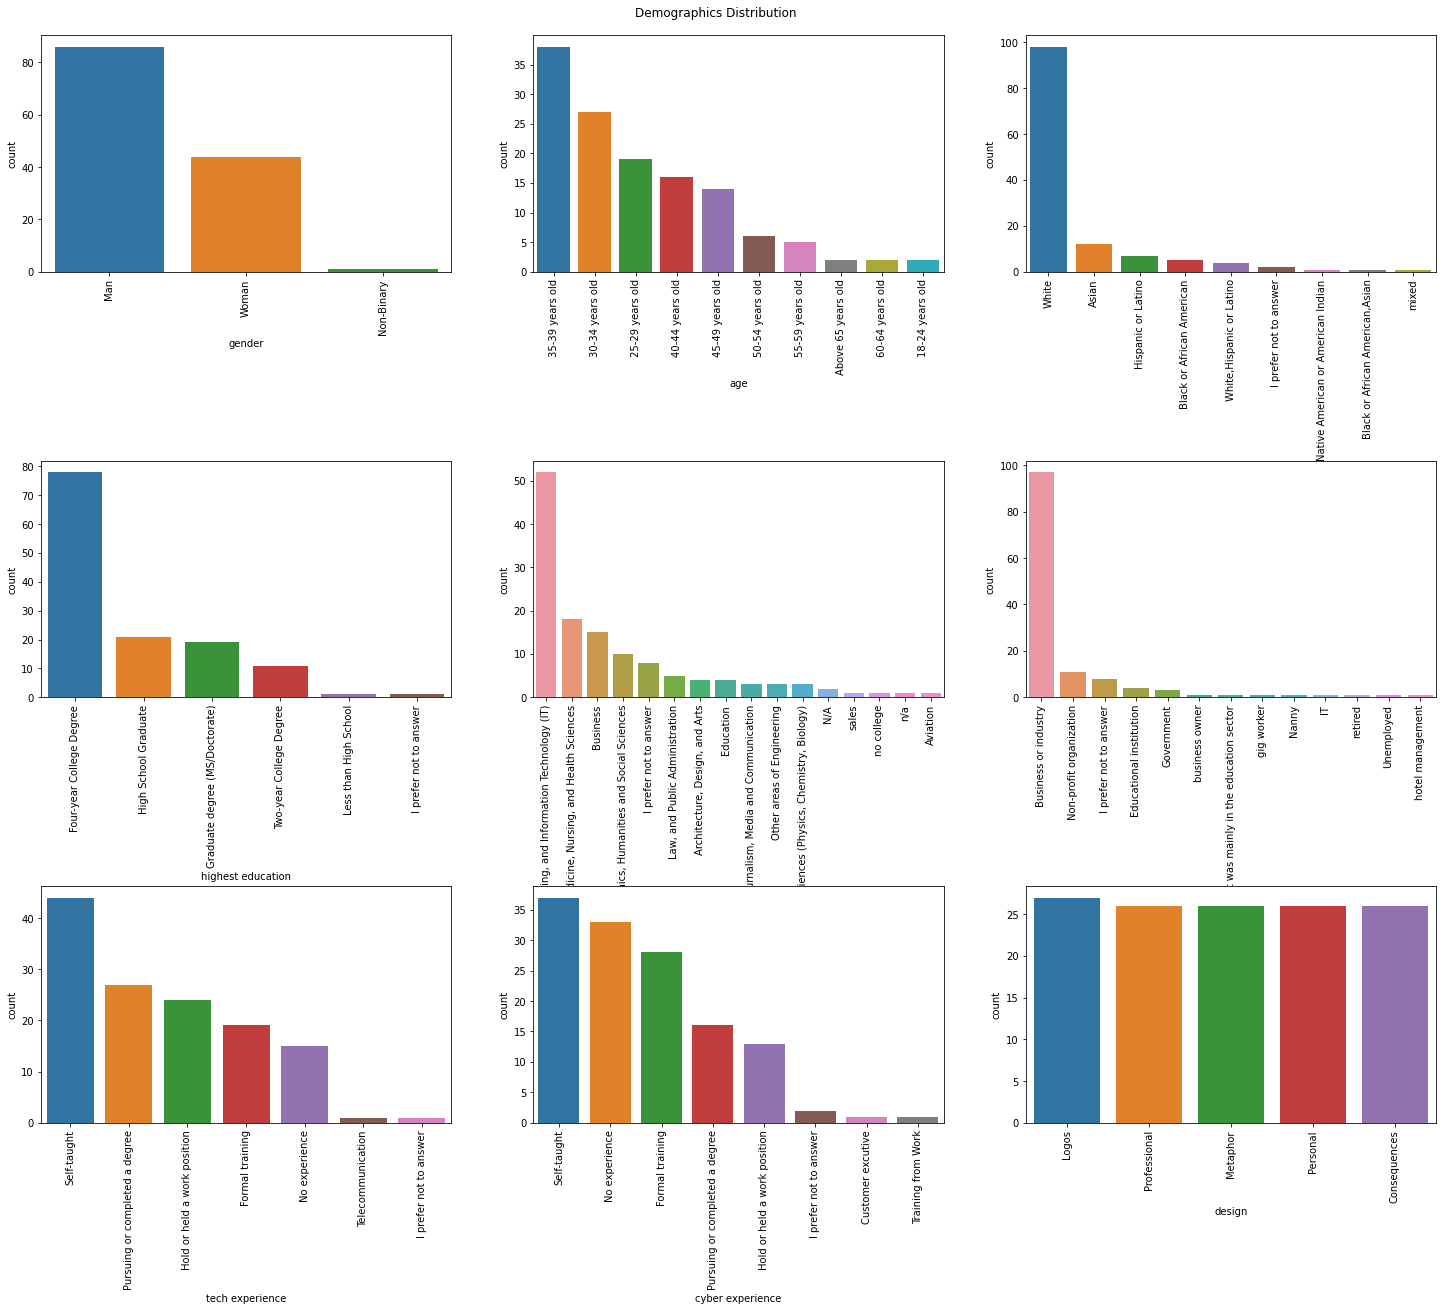

In [27]:
def col_subplot(nrows, ncols, data, title):
    fig, axes = plt.subplots(nrows, ncols, figsize=(25, 20))
    fig.subplots_adjust(hspace=0.8)
    fig.suptitle(title, y=0.9)

    k=0
    for i in range(nrows):
        for j in range(ncols):
            if k < len(data.columns):
                cat = data.columns[k]
                ax = sns.countplot(data=data, x=cat, order=data[cat].value_counts().index, ax=axes[i][j])
                ax.tick_params(axis='x', rotation=90)
                k += 1
col_subplot(3, 3, demo, 'Demographics Distribution')

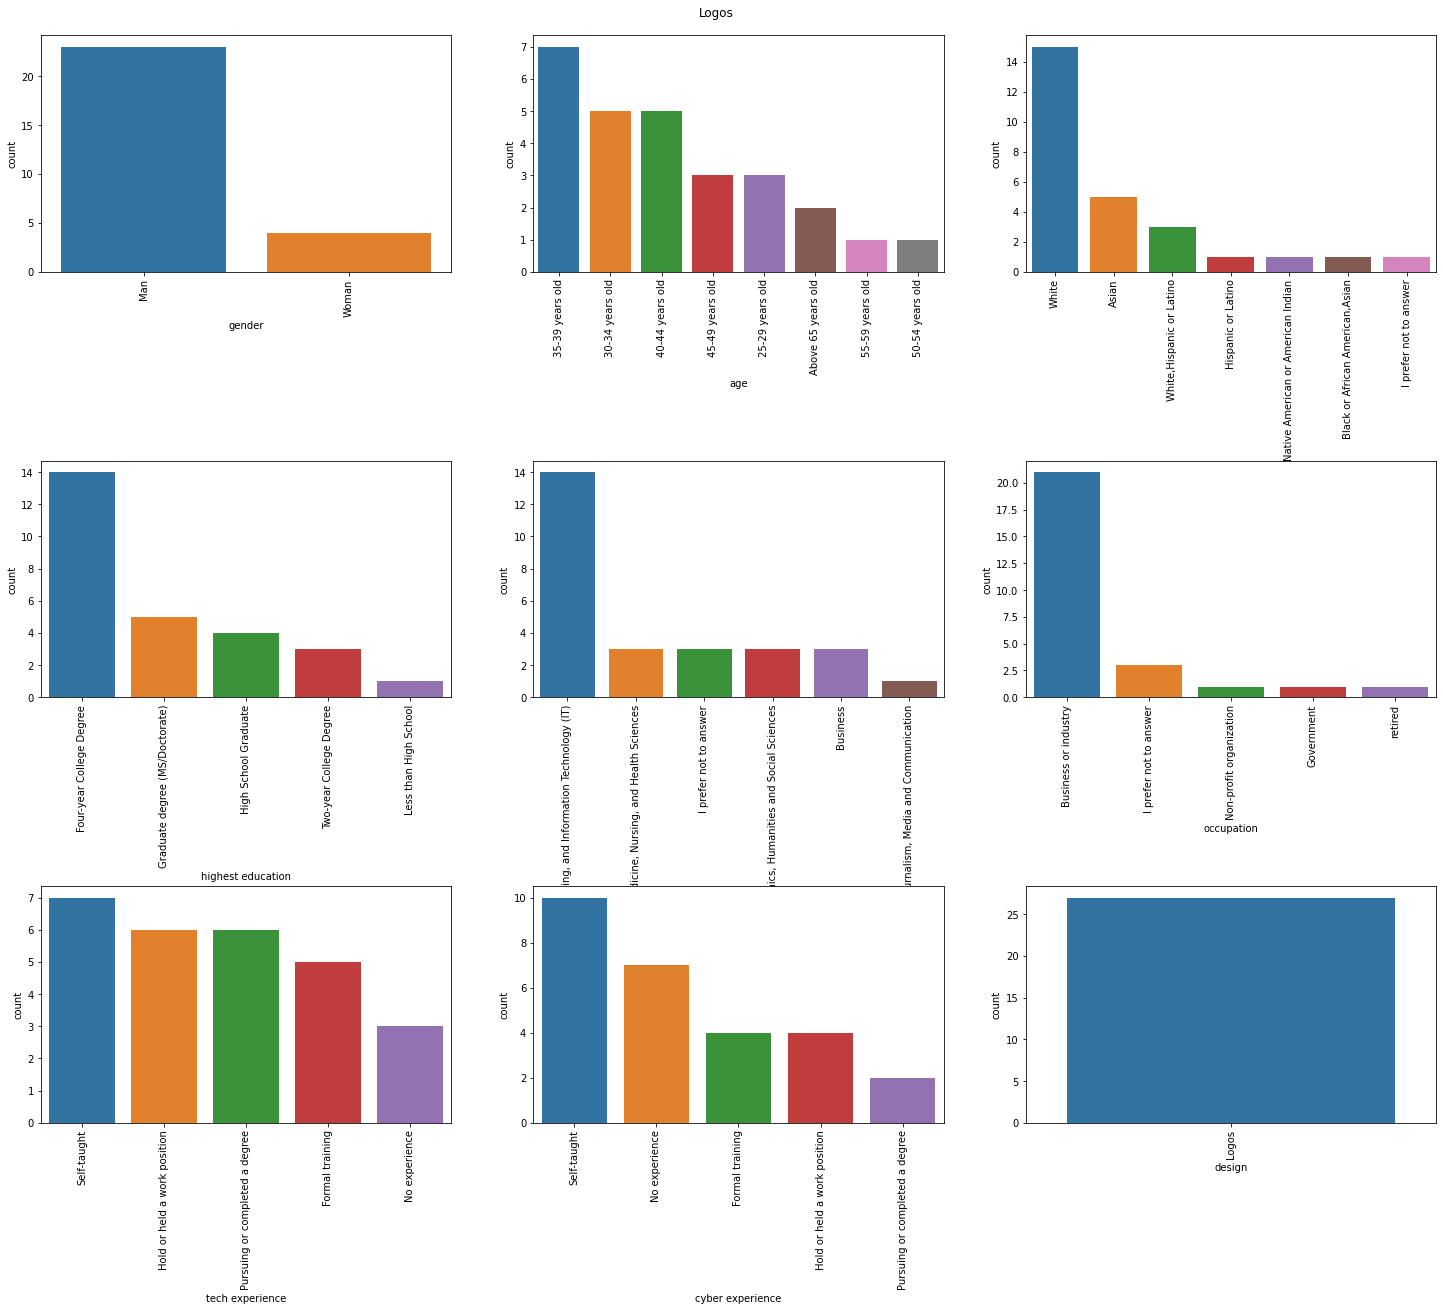

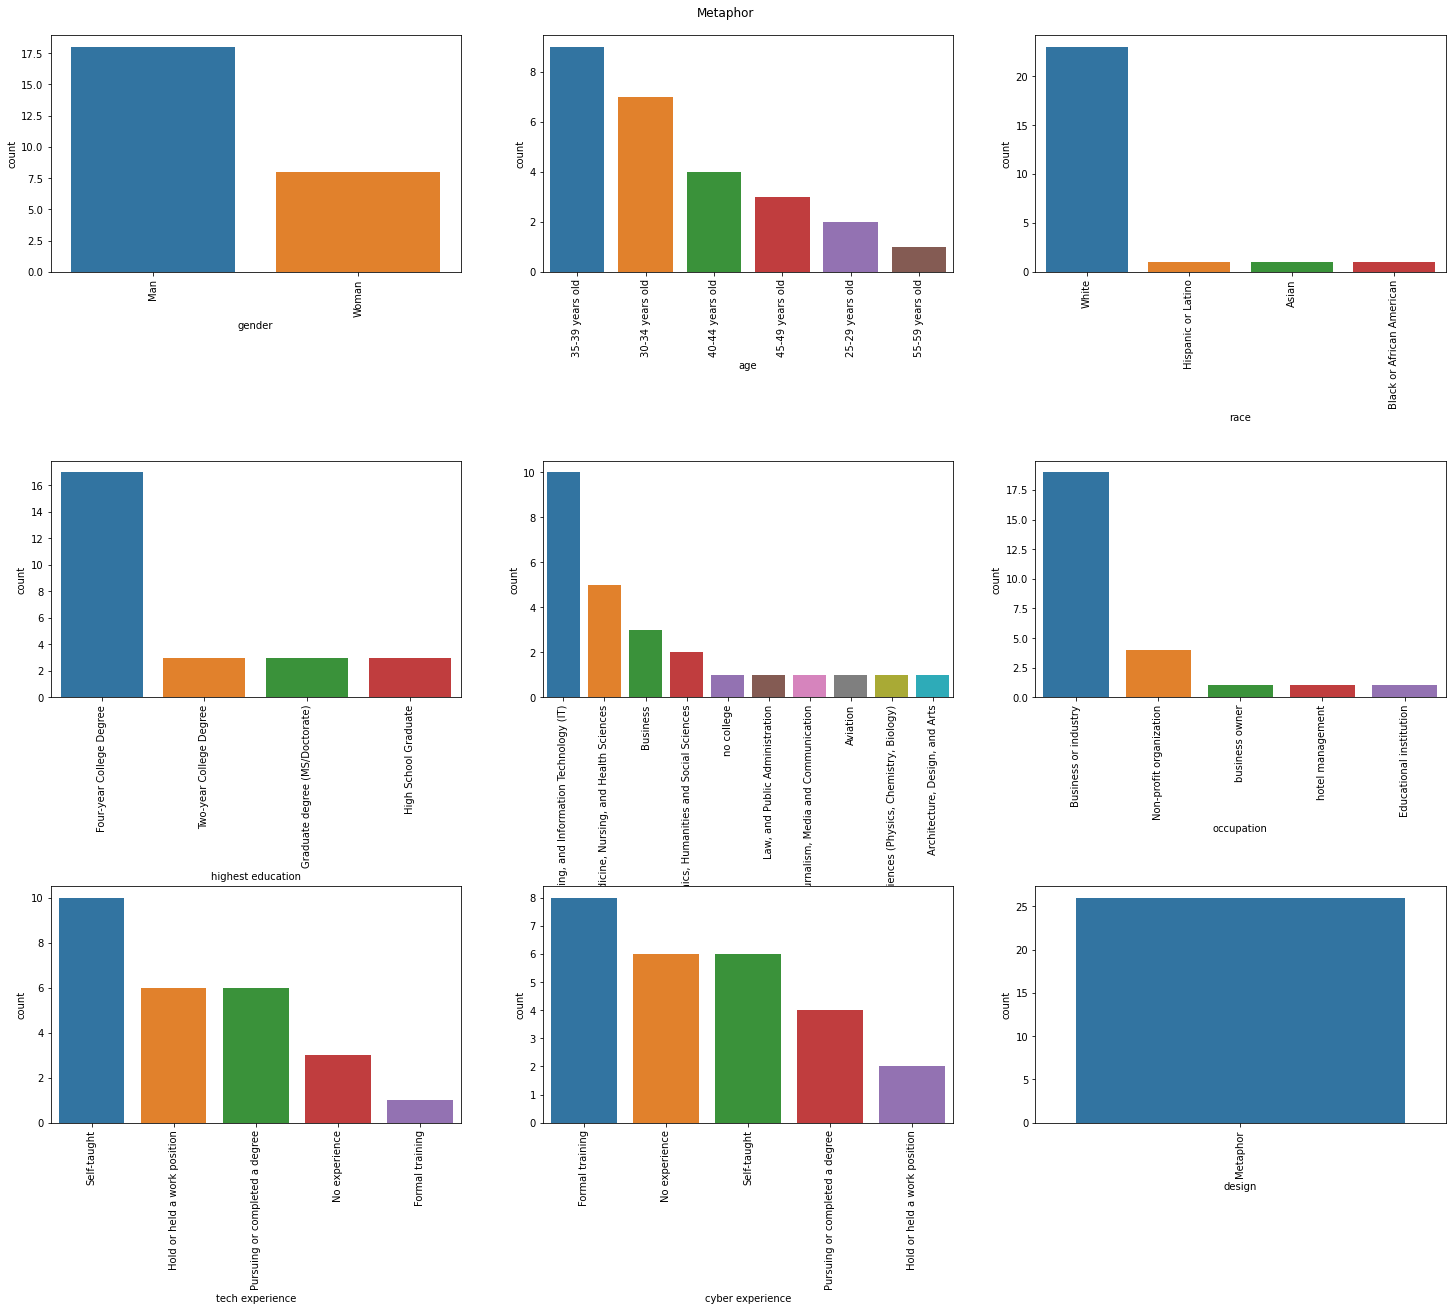

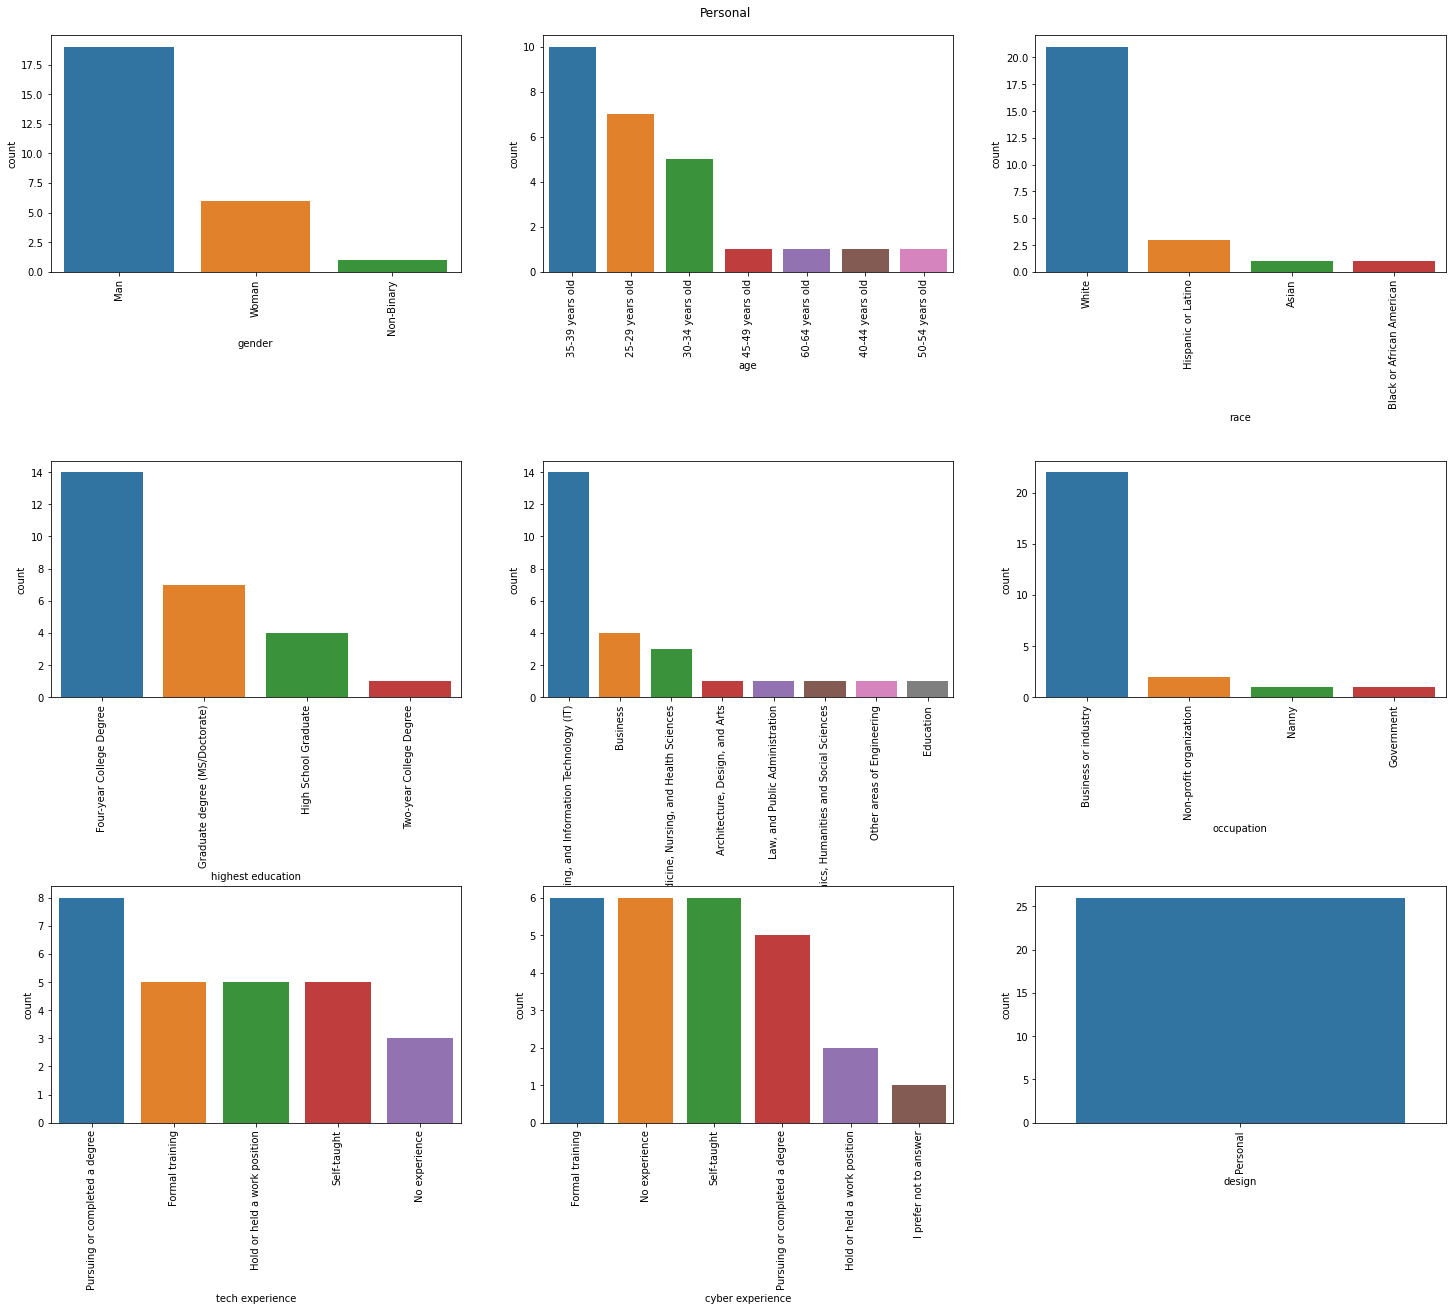

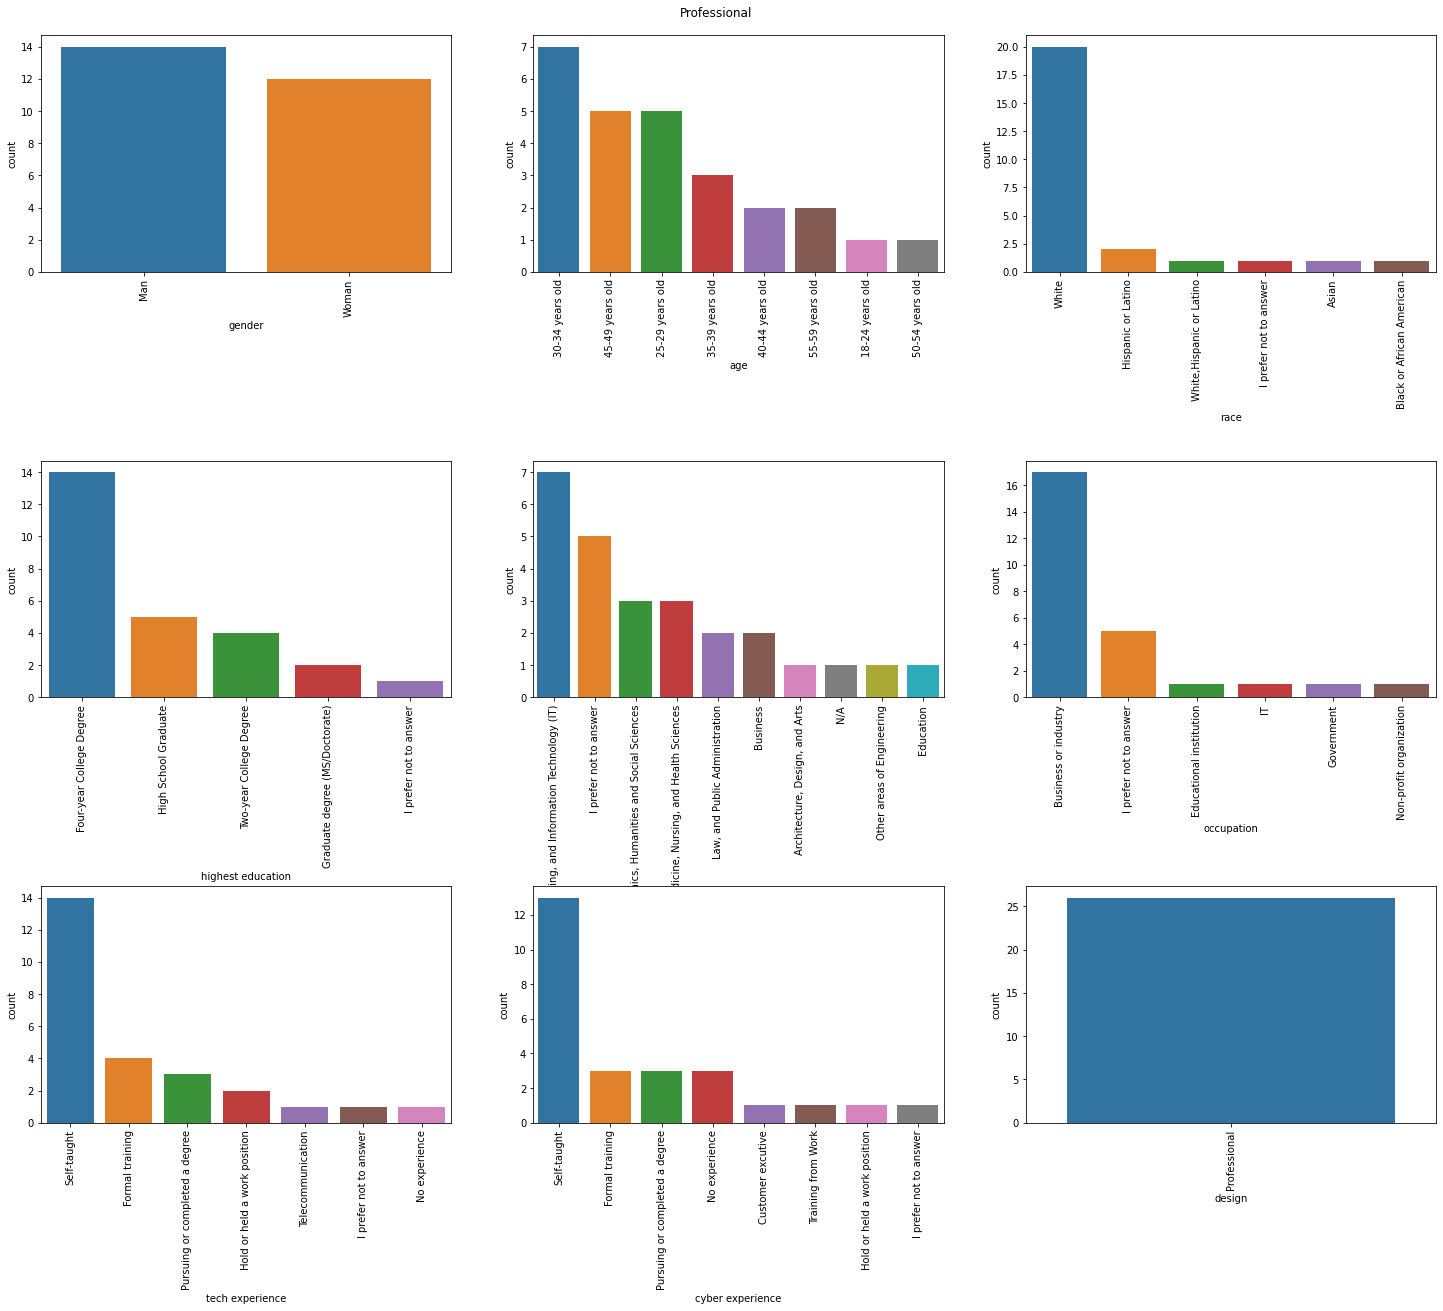

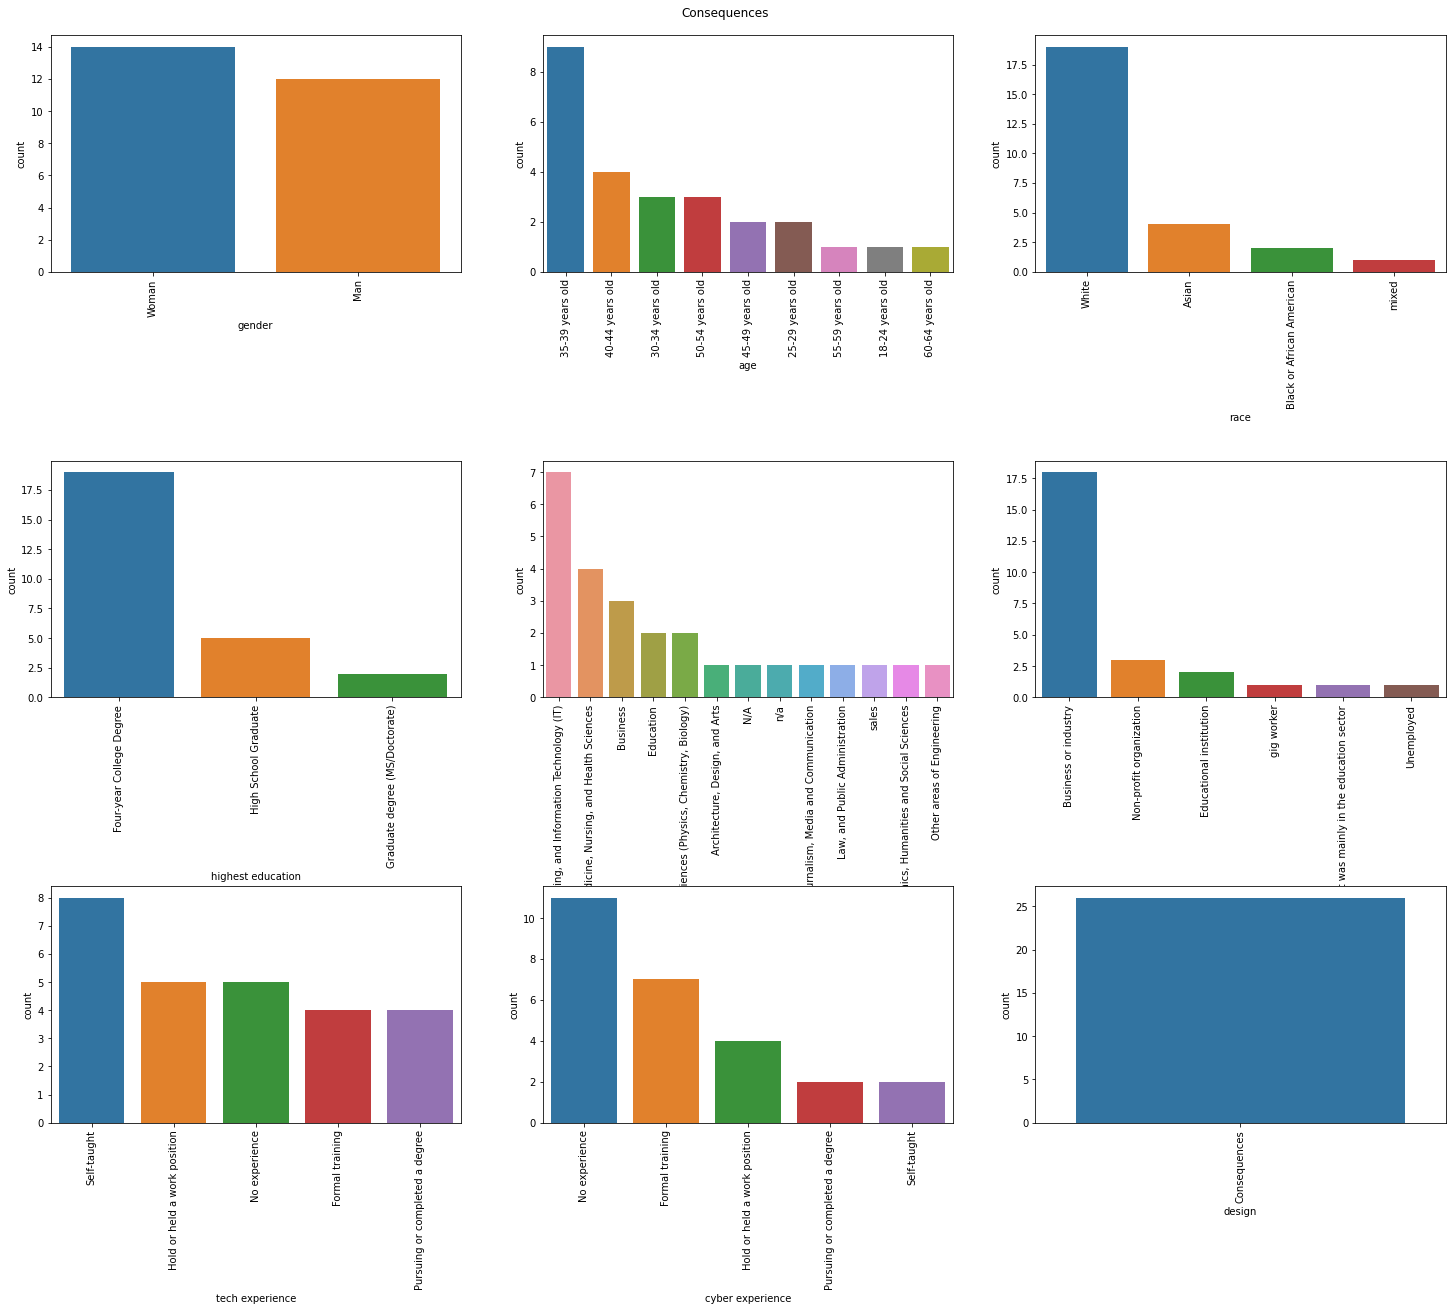

In [28]:
for design in did_map.values():
    data = demo[demo['design']==design]
    col_subplot(3, 3, data, design)
    